<a href="https://colab.research.google.com/github/d1n3sh30/LGM-VIP-Data-Science/blob/main/Neural_Network_That_Can_Read_Handwriting_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LGM VIP-DATA SCIENCE(AUG 2023)

NAME- DINESH KUMAR N

ADVANCED LEVEL TASK

TASK 4- Develop A Neural Network That Can Read Handwriting

Dataset Link-http://yann.lecun.com/exdb/mnist/

Importing libraries

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt

Loading the MNIST dataset

The MNIST Dataset is conatined in the Tensorflow library and can be loaded using Keras. The dataset is then further divided into the training and test set

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Visualizing the dataset

In [ ]:
X_train.shape

(60000, 28, 28)

The training dataset contains 60,000 images where each is 28x28 pixel greyscale image.

In [ ]:
Y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

The training dataset contains 10,000 images where each is 28x28 pixel greyscale images.

**Checking the values of each pixel before the normalization** **process**

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**Visualising the dataset**

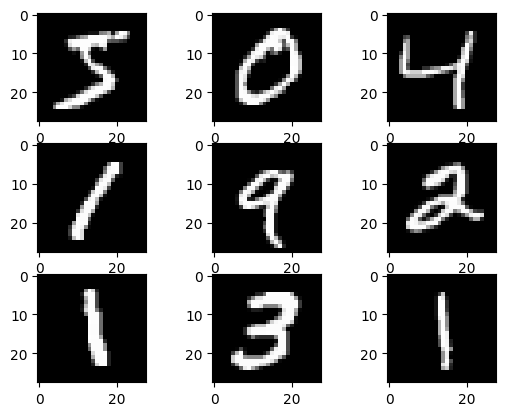

In [ ]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

# **Reshaping the data**

In [ ]:
X_train_r = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[2], 1)
X_test_r = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[2], 1)


# **Normalizing the data**

In [ ]:
X_train_r = tf.keras.utils.normalize(X_train_r, axis = 1)
X_test_r = tf.keras.utils.normalize(X_test_r, axis = 1)

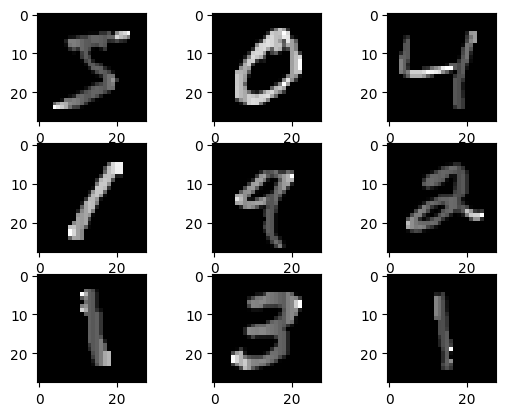

In [ ]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.squeeze(X_train_r[i]), cmap=plt.get_cmap('gray'))
plt.show()

# **Creating a simple CNN Model**

In [ ]:
image_shape = X_train_r.shape[1:]
print(image_shape)

(28, 28, 1)


In [ ]:
model = model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(48, (3,3), activation = tf.nn.relu, input_shape = image_shape))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_r, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 98s 51ms/step - loss: 0.1826 - accuracy: 0.9431
Epoch 2/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0705 - accuracy: 0.9777
Epoch 3/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0523 - accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 95s 50ms/step - loss: 0.0429 - accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0357 - accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0310 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0269 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0256 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0221 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 96s 51m

# **Summary of the CNN Model**

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 48)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        27712     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 1600)             

# **Plotting the CNN Model**

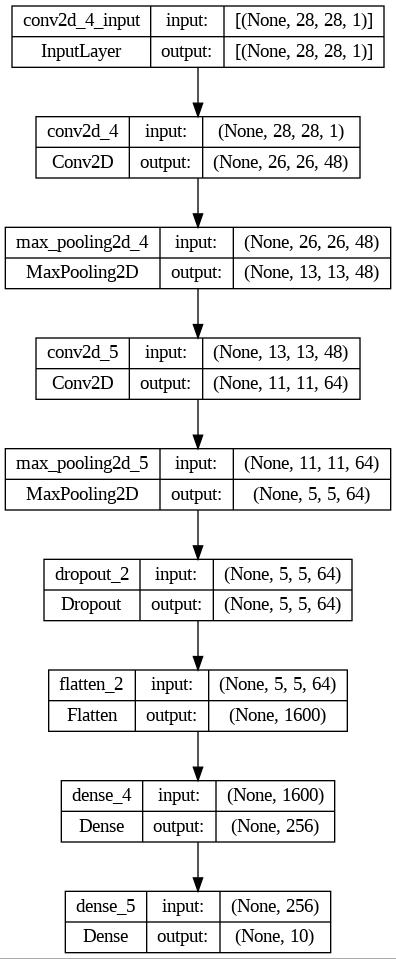

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes = True)

# **Evaluating the model based on validation loss and validation accuracy**

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/CNN_Project/Mnist.model')

# **Predicting a random test case**

In [ ]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/CNN_Project/Mnist.model")

In [ ]:
predictions = new_model.predict(X_test)

313/313 [==============================] - 4s 13ms/step


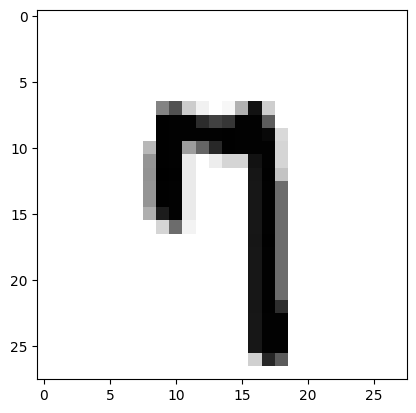

In [ ]:
plt.imshow(X_test[80], cmap = plt.get_cmap('binary'))

In [ ]:
print("The prediction is : ", np.argmax(predictions[80]))

The prediction is :  7
